In [1]:
from itertools import combinations
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from constants import get_problem
from SALib.analyze import sobol
from SALib.util.results import ResultDict

In [2]:
input_dir: str = "outputs"

In [3]:
# load the measurement data
df_list = []
for file in listdir(input_dir):
    df_list.append(
        pd.read_csv(
            f"{input_dir}/{file}",
            index_col=0,
        )
    )
df = pd.concat(df_list)

In [4]:
# analyze the sensitivity
problem = get_problem()

arrested = sobol.analyze(problem, df["arrested"].values, print_to_console=True)
quiet = sobol.analyze(problem, df["quiet"].values, print_to_console=True)
active = sobol.analyze(problem, df["active"].values, print_to_console=True)

/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.694517  0.020113
active_threshold  0.765834  0.018882
reversion_rate    0.830479  0.017671
prob_quiet        0.913022  0.018493
                        S1   S1_conf
legitimacy        0.012822  0.018465
active_threshold  0.028320  0.020256
reversion_rate    0.075259  0.018629
prob_quiet        0.118142  0.021139
                                          S2   S2_conf
(legitimacy, active_threshold)      0.185057  0.031254
(legitimacy, reversion_rate)        0.202546  0.029667
(legitimacy, prob_quiet)            0.224366  0.030098
(active_threshold, reversion_rate)  0.133233  0.029592
(active_threshold, prob_quiet)      0.140751  0.030756
(reversion_rate, prob_quiet)        0.016791  0.025217


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        0.695325  0.017606
active_threshold  0.764668  0.019953
reversion_rate    0.830224  0.019305
prob_quiet        0.912869  0.023659
                        S1   S1_conf
legitimacy        0.012467  0.023024
active_threshold  0.028806  0.023036
reversion_rate    0.075217  0.026865
prob_quiet        0.118491  0.026341
                                          S2   S2_conf
(legitimacy, active_threshold)      0.184079  0.032495
(legitimacy, reversion_rate)        0.202979  0.038977
(legitimacy, prob_quiet)            0.223541  0.033508
(active_threshold, reversion_rate)  0.132354  0.032758
(active_threshold, prob_quiet)      0.139311  0.033675
(reversion_rate, prob_quiet)        0.015626  0.036864


/home/wessel/Documents/external_repos/abm-assignment/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST   ST_conf
legitimacy        1.937906  1.972393
active_threshold  1.084310  0.411901
reversion_rate    1.000824  0.275891
prob_quiet        0.904678  0.279474
                        S1   S1_conf
legitimacy        0.047073  0.091861
active_threshold -0.004342  0.032514
reversion_rate    0.028168  0.040737
prob_quiet        0.014146  0.037516
                                          S2   S2_conf
(legitimacy, active_threshold)     -0.025951  0.099052
(legitimacy, reversion_rate)       -0.055911  0.099044
(legitimacy, prob_quiet)           -0.037860  0.099276
(active_threshold, reversion_rate)  0.007195  0.045785
(active_threshold, prob_quiet)      0.047308  0.059408
(reversion_rate, prob_quiet)       -0.026314  0.056930


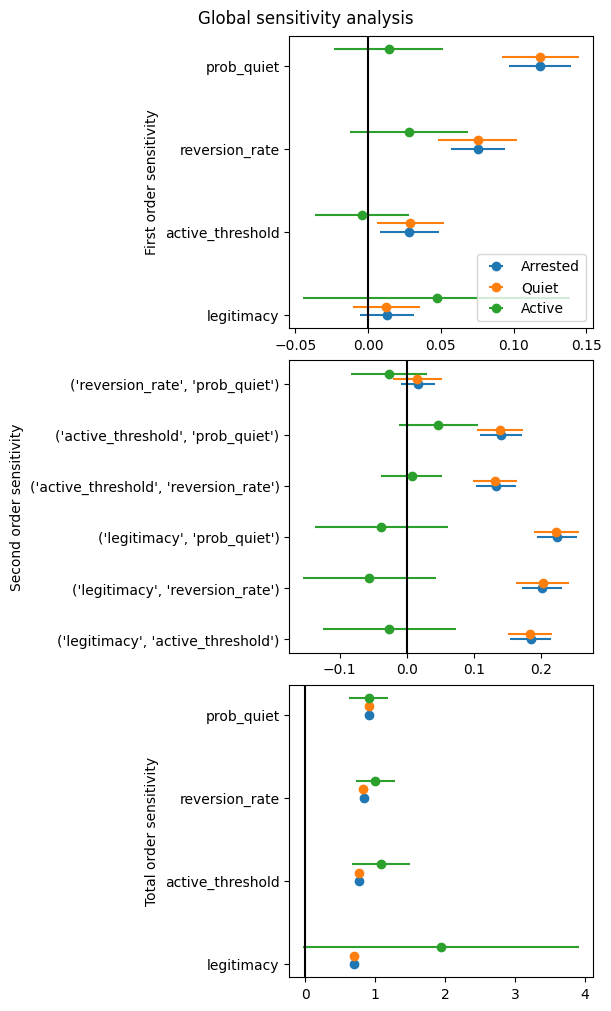

In [5]:
def plot_all_indices(analyses: dict[str, ResultDict], params, title=""):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        analyses (dict[str, ResultDict]): dictionary mapping the name of the analysis to
            dictionaries {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the names of the parameters in the analyses
        title (str): title for the plot
    """
    single_names = params
    second_names = list(combinations(params, 2))

    fig, axes = plt.subplots(3, 1, figsize=(6, 10), layout="compressed")

    for nr, analysis in enumerate(analyses.items()):
        name, s = analysis
        for i in ["1", "2", "T"]:
            # first order
            if i == "1":
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[0].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # second order
            elif i == "2":
                flattened = s["S" + i].flatten()
                indices = flattened[~np.isnan(flattened)]

                flattened = s["S" + i + "_conf"].flatten()
                errors = flattened[~np.isnan(flattened)]
                axes[1].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )
            # total order
            else:
                indices = s["S" + i]
                errors = s["S" + i + "_conf"]
                axes[2].errorbar(
                    indices,
                    np.arange(len(indices)) + nr * 0.1,
                    xerr=errors,
                    linestyle="None",
                    marker="o",
                    label=name,
                )

    axes[0].set_yticks(range(len(single_names)), single_names)
    axes[1].set_yticks(range(len(second_names)), second_names)
    axes[2].set_yticks(range(len(single_names)), single_names)

    axes[0].axvline(0, c="k")
    axes[1].axvline(0, c="k")
    axes[2].axvline(0, c="k")

    axes[0].set_ylabel("First order sensitivity")
    axes[1].set_ylabel("Second order sensitivity")
    axes[2].set_ylabel("Total order sensitivity")

    axes[0].legend()
    fig.suptitle(title)


plot_all_indices(
    {"Arrested": arrested, "Quiet": quiet, "Active": active},
    problem["names"],
    "Global sensitivity analysis",
)
plt.show()